## PREFACE

### Descriptions of this project: 
* Import two "*.csv" files and combine data into one comprehensive database
* Perform data analytics on research tumor volumes data that was collected from different drug's clinical trials on Lab Mice.

### Techniques implemented include:  
* Merging and filtering data based on subject of interests by using <.merge()>, <.loc>
* Performing statiscal analysis by <mean()>, <max()>, <sem()>, <quartiles()>, etc.
* Creating Matplotlib & pandas bar charts for tumor volumes, pie charts for mouse gender distribution, box plot for different drug regimens
* Linear regression to determine relationship between average tumor volumes and mouse weights

### Conclusions:
* There is 1.2% more male mice than female ones.
* Top 4 Drug Regimens that have most data points: Capomulin, Ramicane, Ketapril, Naftisol.
* There is no outlier among the top four drug regimens, indicating the collected data is reliable and with minimal bias.
* The four most promising drug regimens (based on smallest average tumor volumes of all mice) are: Ramicane, Propriva, Capomulin, Ceftamin.
* For Mouse ID# l509: the overal tumor volume decreases (comparing starting point and ending point).
* There is a "positive linear relationship" between mouse weights and average tumor volume: the heavier the mouse, the larger the tumor volume.


## LET'S GET STARTED!

## Dependencies and importing "*.csv files"

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Good advise from Jeff, create a variable to hold a numeric value so we can
# change it later quickly
max_promising_drgReg = 4

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single database
comb_data = pd.merge(mouse_metadata, study_results, how='left',on="Mouse ID")

# this step is not really necessary but I was just curious how it would be like
# after combining both data flies together 
comb_data.to_csv("data/combined_data.csv", index=False)

# Group combined data as per Drug Regimen
drug_grp_data = comb_data.groupby(comb_data['Drug Regimen'])
drug_grp_data.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
692,c580,Ketapril,Male,22,25,10,47.570174,1
693,c580,Ketapril,Male,22,25,15,51.991708,1
694,c580,Ketapril,Male,22,25,20,55.575322,2
695,c580,Ketapril,Male,22,25,25,56.289062,2


In [2]:
# Extract Tumor Volume column after merging both .csv files for ease of statistical calculations
tumor_vol = drug_grp_data["Tumor Volume (mm3)"]

## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_tbl_df = pd.DataFrame({
    "Tumor Volume Mean" : tumor_vol.mean(),  # == average 
    "Tumor Volume Median" : tumor_vol.median(),
    "Tumor Volume Variance" : tumor_vol.var(),
    "Tumor Volume Std. Dev." : tumor_vol.std(),
    "Tumor Volume Std. Err. (SEM)" : tumor_vol.sem(),
    })
summary_tbl_df.sort_values(by='Tumor Volume Mean', ascending=True)

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err. (SEM)
Drug Regimen,,,,,
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar plots

<function matplotlib.pyplot.show(*args, **kw)>

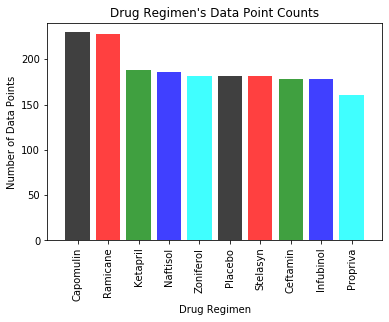

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# count data points of each drug regimens and convert to dictionary for ease of plotting
data_pt_counts = dict(comb_data["Drug Regimen"].value_counts())

# create x-axis tick locations and assign x/y-axis data
xtick_loc = [tick for tick in np.arange(len(data_pt_counts))]
x_axis = data_pt_counts.keys()
y_axis = data_pt_counts.values()

# create bar chart and axis labels
plt.bar(x_axis, y_axis, alpha=0.75, align = 'center', color=['black', 'red', 'green', 'blue', 'cyan'])
plt.xticks(xtick_loc, x_axis, rotation='vertical')
plt.title("Drug Regimen's Data Point Counts")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.xlim(-1, len(x_axis))
plt.ylim(0, max(y_axis)+10)
plt.show

Text(0, 0.5, 'Data Point Counts')

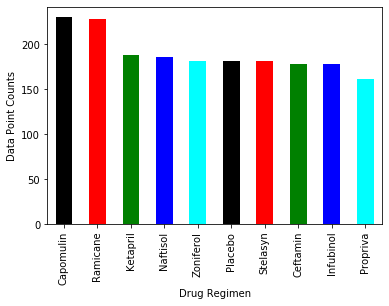

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
drug_reg_count = comb_data["Drug Regimen"].value_counts()

# create bar chart and axis labels
drug_plot = drug_reg_count.plot(kind='bar', color=['black', 'red', 'green', 'blue', 'cyan'])
drug_plot.set_xlabel("Drug Regimen")
drug_plot.set_ylabel("Data Point Counts")


## Pie plots

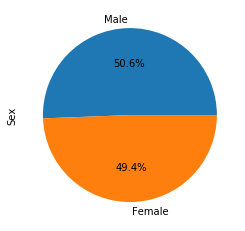

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender_group = comb_data["Sex"].value_counts()
mice_gender_plot_pd = mice_gender_group.plot(kind="pie", autopct="%1.1f%%")


Text(0.5, 1.0, 'Sex')

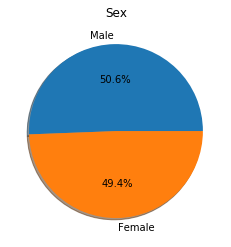

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_gender_dict = dict(mice_gender_group)
plt.pie(mice_gender_group, autopct="%1.1f%%", shadow=True, labels=mice_gender_dict.keys())
plt.title("Sex")

## Quartiles, outliers and boxplots

In [16]:
# Group the database by Mouse ID
# get the max value to find the endpoints of experimental periods for each mouse
mouse_group = comb_data.groupby('Mouse ID').max()
mouse_group = mouse_group.reset_index()
mouse_group.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1


In [17]:
# merge the original database into the mouse_group table to get the final values of each categories (columns) at the endpoint row
mouse_max = mouse_group[['Mouse ID', 'Timepoint']].merge(comb_data, on=['Mouse ID', 'Timepoint']) 
mouse_max.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [10]:
# create new dataframe to hold calculated results of tumor volume's mean, median, variance, std dev and sem
df_analysis = mouse_max.groupby('Drug Regimen').agg({
    "Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']
    })

# rename columns to drop the "Tumor Volume (mm3)" common column
df_analysis.columns = ['mean', 'median', 'var', 'std', 'sem']
df_analysis

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


In [11]:
# Choose the most promising drug regimens by smallest mean values:
# this means: the smaller the tumor volume, the more promising the drug regimen is
# then, filter out the data for only this top 4
promis_drug_df = df_analysis.nsmallest(max_promising_drgReg, ['mean'])

# extract the list of 4 drug names
lis_of_prom_drug = list(promis_drug_df.index.values)

# create several empty lists so I can loop and extract data for each drug name
combined_boxplot_data = [] # this will become my y-axis on the box plot 
x_axis = [] # x-axis will be my horiz axis on the box plot 

# looping to extract drug regimen and tumor volume of each drug regimen by using <<.loc>> function
# also while looping calculate Quartiles, IRQ and find Outliers
for eachname in lis_of_prom_drug:
    x_axis.append(eachname)
    filtered_grp_data = mouse_max.loc[mouse_max['Drug Regimen']==eachname, ['Drug Regimen', 'Tumor Volume (mm3)']]
    list_eachname_tumorVol = list(filtered_grp_data['Tumor Volume (mm3)'])
    combined_boxplot_data.append(list_eachname_tumorVol)
   

    #================  Quartiles, IRQ and Outliers =================
    # print the header of each drug regimen
    print('==============================================================')
    print('')
    print(f'For the Drug Regimen: \033[1;31;43m {eachname} \033[00m, here are the results:')
    print('______________________________________________________________')
    
    # Calculations 
    total_tum_vol = int(filtered_grp_data['Tumor Volume (mm3)'].sum())
    quartiles = filtered_grp_data['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = round(quartiles[0.25], 2)
    upperq = round(quartiles[0.75], 2)
    medq = round(quartiles[0.5], 2)
    iqr = round(upperq-lowerq, 2)
    lower_bound = round(lowerq - (1.5*iqr), 2)
    upper_bound = round(upperq + (1.5*iqr), 2)
    
    # Show outliers
    outliers = []
    for each_tmvol in filtered_grp_data['Tumor Volume (mm3)']:
        if each_tmvol > upper_bound or each_tmvol < lower_bound:
            outliers.append(each_tmvol)
   
    # display all results, it is hard to read as I embedded format codes into the strings
    # there may be a better way to do it by importing color module
    # or using concat with << + >> to connect all strings and format together, could be easier to read that way
    print(f"Total of Tumor Volumes: \033[1;34m{total_tum_vol:,}\033[00m")
    print(f"The \033[1;34mlower quartile\033[00m of Tumor Volume: \033[1;34m{lowerq}\033[00m")
    print(f"The \033[1;34mupper quartile\033[00m of Tumor Volume: \033[1;34m{upperq}\033[00m")
    print(f"The \033[1;34minterquartile range (IQR)\033[00m of Tumor Volume: \033[1;34m{iqr}\033[00m")
    print(f"The the \033[1;34mmedian\033[00m of Tumor Volume: \033[1;34m{medq}\033[00m")
    print(f"Values \033[1;34mbelow {lower_bound}\033[00m could be \033[1;34moutliers\033[00m.")
    print(f"Values \033[1;34mabove {upper_bound}\033[00m could be \033[1;34moutliers\033[00m.")
    
    # I couldn't use list comprehension to print out all outliers
    # so I ended up choosing to build a simple loop instead 
    outlier=0
    if len(outliers) == 0:
        print(f"Final results show \033[1;31mNO OUTLIER\033[00m.")
    else:
        while outlier < len(outliers): 
            print(f'Outlier:\033[1;31m{round(outliers[outlier],2)}\033[00m') 
            outlier += 1 
    print('------------------------------')
    print(f'End of \033[1;31m{eachname}\033[00m results.')
    print('')
    
# I love the visualization of where things begin and where they end
# Plus, color coded texts are my favorite

print(x_axis)



For the Drug Regimen:  Ramicane , here are the results:
______________________________________________________________
Total of Tumor Volumes: 904
The lower quartile of Tumor Volume: 31.56
The upper quartile of Tumor Volume: 40.66
The interquartile range (IQR) of Tumor Volume: 9.1
The the median of Tumor Volume: 36.56
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.
Final results show NO OUTLIER.
------------------------------
End of Ramicane results.


For the Drug Regimen:  Capomulin , here are the results:
______________________________________________________________
Total of Tumor Volumes: 916
The lower quartile of Tumor Volume: 32.38
The upper quartile of Tumor Volume: 40.16
The interquartile range (IQR) of Tumor Volume: 7.78
The the median of Tumor Volume: 38.13
Values below 20.71 could be outliers.
Values above 51.83 could be outliers.
Final results show NO OUTLIER.
------------------------------
End of Capomulin results.


For the Drug Regimen:  Pro

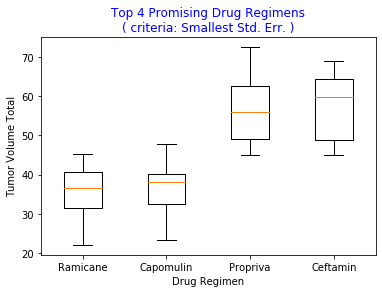

In [12]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Top 4 Promising Drug Regimens\n( criteria: Smallest Std. Err. )', color='blue') # chart main title
ax1.set_xlabel('Drug Regimen') # setting x-axis label
ax1.set_ylabel('Tumor Volume Total') # setting y-axis label
ax1.set_xticklabels(x_axis) # setting x-axis tickmark labels

# format outliers to show them clearer in the boxplot, assigned red color as fill
outlier_format = dict(marker='o', markerfacecolor='r', markersize = 6, markeredgecolor = 'g', linestyle='none')

# plot data on the box plot with formatted outliers
ax1.boxplot(combined_boxplot_data, flierprops = outlier_format)
plt.show()

## Line and scatter plots

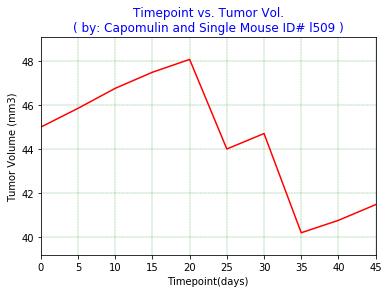

In [33]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# I picked Capomulin and unique mouse ID == l509 to filter out data
capomulin_data_time = comb_data.loc[(comb_data['Drug Regimen']=="Capomulin") & (comb_data['Mouse ID']=="l509"), :]

# making line plot from filtered data
x_axis = capomulin_data_time['Timepoint']
y_axis = capomulin_data_time['Tumor Volume (mm3)']
plt.plot(x_axis, y_axis, 'r')
plt.title("Timepoint vs. Tumor Vol.\n( by: Capomulin and Single Mouse ID# l509 )", color='blue')
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(x_axis.min(), x_axis.max())
plt.ylim(y_axis.min() - 1, y_axis.max() + 1)
plt.grid(color='g', linestyle='--', linewidth=0.3)
plt.show()

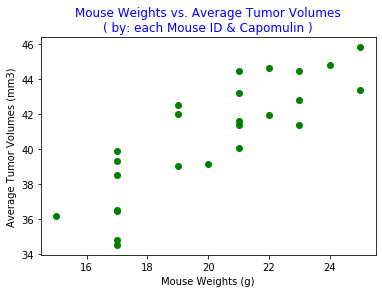

In [14]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# I picked Capomulin to filter out data
capomulin_data_wgt = comb_data.loc[(comb_data['Drug Regimen']=="Capomulin"), :]

# Group data based on Mouse ID and perform << mean() >> calculations
capomulin_data_wgt = capomulin_data_wgt.groupby(["Mouse ID"])
capomulin_aver_weight = capomulin_data_wgt["Weight (g)"].mean()
capomulin_aver_tumor_vol= capomulin_data_wgt["Tumor Volume (mm3)"].mean()

# making scatter plot
plt.scatter(x=capomulin_aver_weight, y=capomulin_aver_tumor_vol,color='green')
plt.title("Mouse Weights vs. Average Tumor Volumes\n( by: each Mouse ID & Capomulin )", color='b')
plt.xlabel("Mouse Weights (g)")
plt.ylabel("Average Tumor Volumes (mm3)")
plt.show()
            

--------------------------------------------------
The Correlation Coefficient is:  0.84 
--------------------------------------------------
The Linear Regression Model:  y = 0.95x + 21.55 
--------------------------------------------------


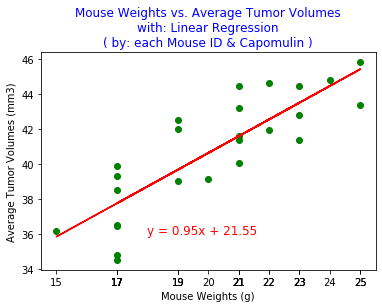

In [15]:
# Calculate the correlation coefficient & linear regression model
# for mouse weight vs. average tumor volume & Capomulin 
plt_slope, plt_incpt, plt_rval, plt_pval, plt_stderr = st.linregress(capomulin_aver_weight, capomulin_aver_tumor_vol)

# Curve fit model
plt_lin_fit = plt_slope * capomulin_aver_weight + plt_incpt

# create string for curve fit equation
line_eq = "y = " + str(round(plt_slope,2)) + "x + " + str(round(plt_incpt,2))

print(f'--------------------------------------------------\n\
The Correlation Coefficient is: \033[1;34m {round(plt_rval, 2)} \033[00m\
\n--------------------------------------------------')

print(f'The Linear Regression Model: \033[1;31m {line_eq} \033[00m\
\n--------------------------------------------------')


# Plot the linear model on top of scatter plot 
plt.scatter(capomulin_aver_weight,capomulin_aver_tumor_vol, color = 'g')
plt.plot(capomulin_aver_weight,plt_lin_fit, color='r')
plt.xticks(capomulin_aver_weight)

plt.title("Mouse Weights vs. Average Tumor Volumes\n\
with: Linear Regression\n( by: each Mouse ID & Capomulin )", color ='b')

plt.xlabel("Mouse Weights (g)")
plt.ylabel("Average Tumor Volumes (mm3)")
line_eq = "y = " + str(round(plt_slope,2)) + "x + " + str(round(plt_incpt,2))
plt.annotate(line_eq,(18,36),fontsize=12,color="r")
plt.show()